<a href="https://colab.research.google.com/github/J0hnV1ct0r/Deep_learning/blob/main/DeepLearningAluraTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iniciando df

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
passageiros = pd.read_csv('Passageiros.csv')

In [ ]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

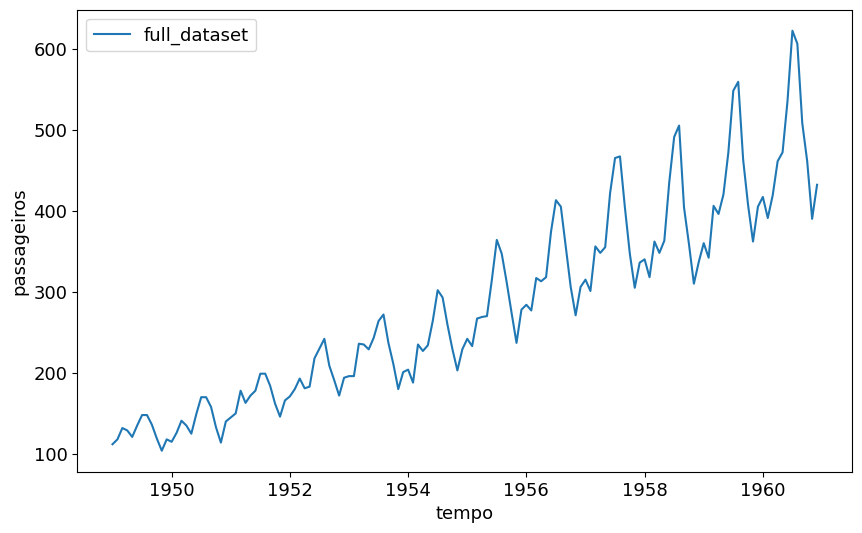

In [ ]:
mlt.rcParams['figure.figsize'] =  (10,6)
mlt.rcParams['font.size'] = 13
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='full_dataset')

# Preprocessamento

In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit(passageiros)

StandardScaler()

In [ ]:
dado_escalado = sc.transform(passageiros)

In [ ]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0, 0.5, 'passageiros')

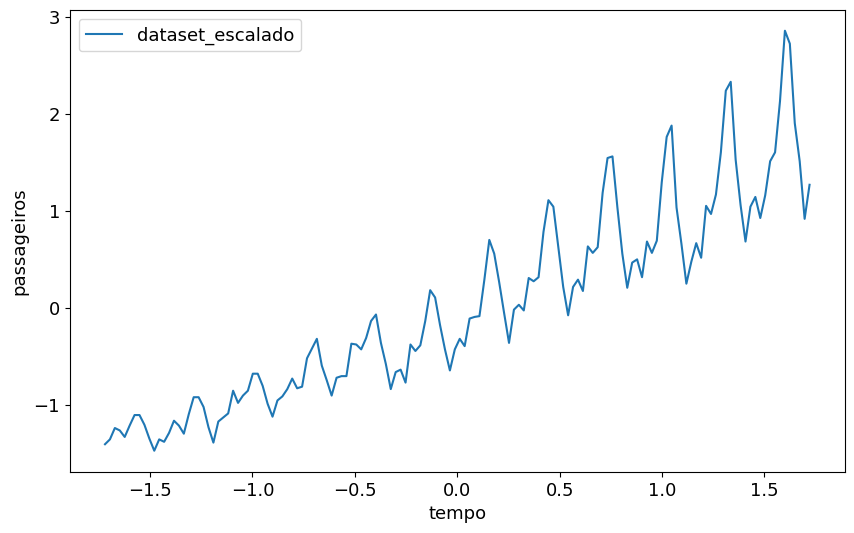

In [ ]:
sns.lineplot(x=x,y=y,label='dataset_escalado')
plt.xlabel('tempo')
plt.ylabel('passageiros')

In [ ]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros)-tamanho_treino

In [ ]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0, 0.5, 'passageiros')

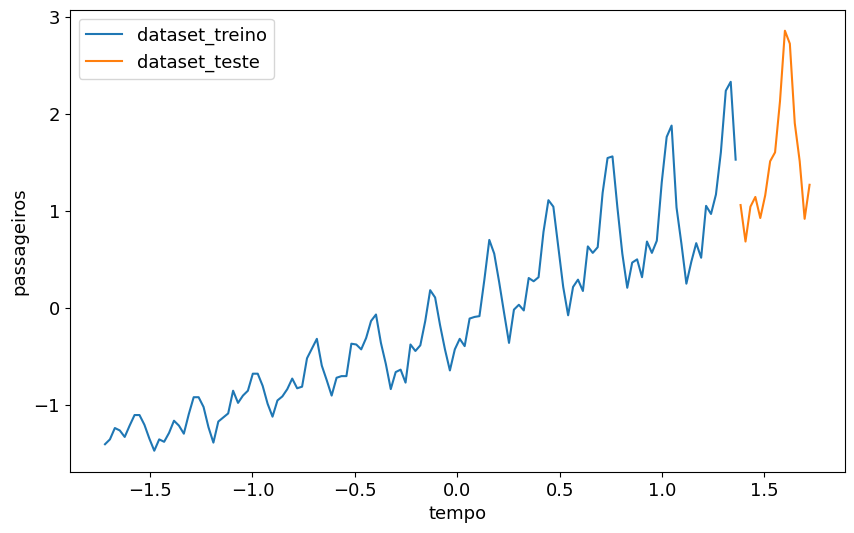

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='dataset_treino')
sns.lineplot(x=xteste, y=yteste, label='dataset_teste')
plt.xlabel('tempo')
plt.ylabel('passageiros')

# Teste de Redes

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Rede 1

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(Dense(1,input_dim=1,kernel_initializer='Ones',activation='linear',use_bias=False))

In [ ]:
regressor.compile(loss='mean_squared_error', optimizer='adam')
regressor.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x79a34b8d5630>>

In [ ]:
regressor.fit(xtreino,ytreino)

5/5 [==============================] - 1s 6ms/step - loss: 0.1285


In [ ]:
y_predict = regressor.predict(xtreino)

5/5 [==============================] - 0s 3ms/step


<Axes: >

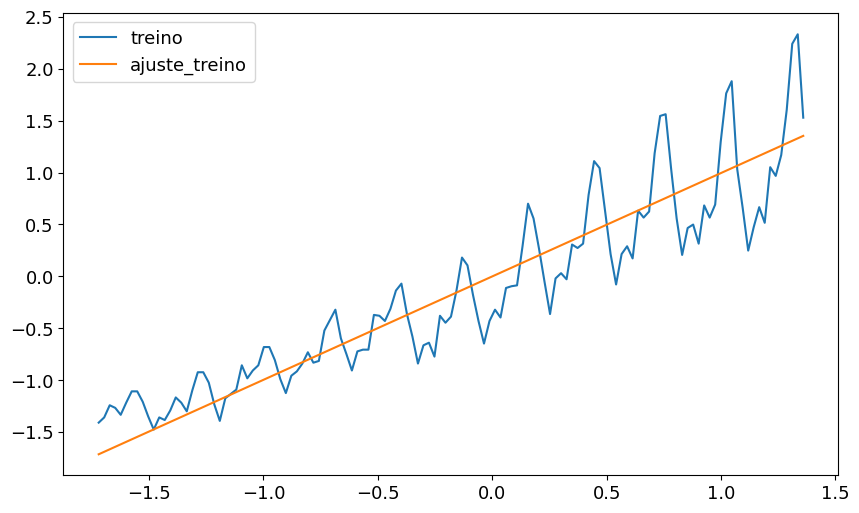

In [ ]:
sns.lineplot(x=xtreino,y=ytreino, label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0], label='ajuste_treino')

In [ ]:
d = {'tempo':xtreino, 'passageiros':y_predict[:,0]}
resultados = pd.DataFrame(data=d)


In [ ]:
resultado_trasnf = sc.inverse_transform(resultados)
resultado_trasnf =  pd.DataFrame(data=resultado_trasnf)
resultado_trasnf.columns = ['tempo','passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

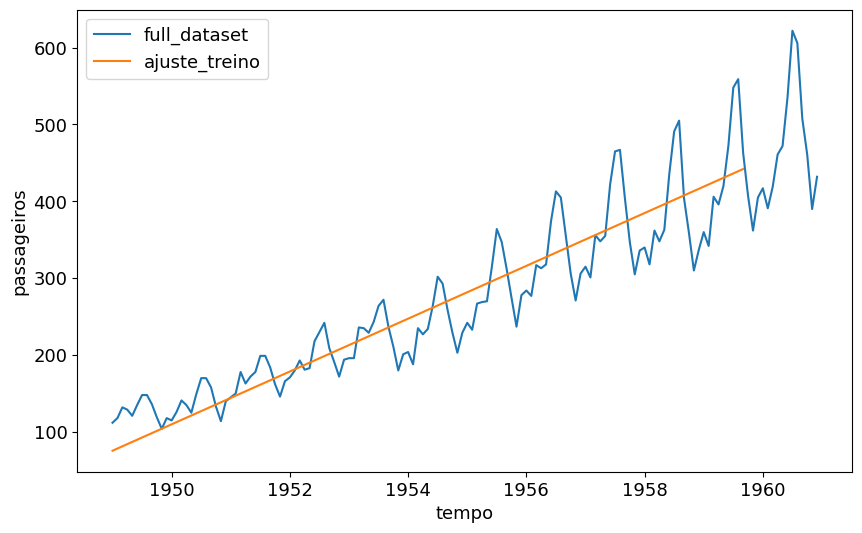

In [ ]:
sns.lineplot(x='tempo',y='passageiros',data=passageiros, label='full_dataset')
sns.lineplot(x='tempo',y='passageiros',data=resultado_trasnf, label='ajuste_treino')

In [ ]:
y_predict_teste = regressor.predict(xteste)
d = {'tempo':xteste, 'passageiros':y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

1/1 [==============================] - 0s 33ms/step


In [ ]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo','passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

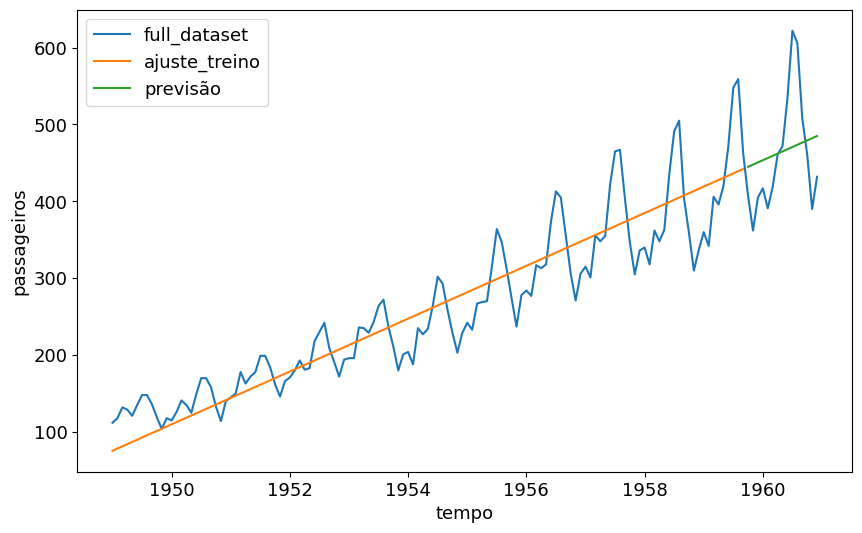

In [ ]:
sns.lineplot(x='tempo',y='passageiros',data=passageiros, label='full_dataset')
sns.lineplot(x='tempo',y='passageiros',data=resultado_trasnf, label='ajuste_treino')
sns.lineplot(x='tempo',y='passageiros',data=resultado_transf_teste, label='previsão')

## Rede 2

In [ ]:
regressor2 = Sequential()

In [ ]:
regressor2.add(Dense(8,input_dim=1,kernel_initializer='random_uniform',
                     activation='sigmoid',use_bias=False))
regressor2.add(Dense(8,kernel_initializer='random_uniform',
                     activation='sigmoid',use_bias=False))
regressor2.add(Dense(1,kernel_initializer='random_uniform',
                     activation='linear',use_bias=False))

In [ ]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor2.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x79a3483e05e0>>

In [ ]:
regressor2.fit(xtreino,ytreino,epochs=500)

Epoch 1/500
5/5 [==============================] - 1s 3ms/step - loss: 0.8656
Epoch 2/500
5/5 [==============================] - 0s 5ms/step - loss: 0.8557
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8462
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8373
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8319
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8275
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8211
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8168
Epoch 9/500
5/5 [==============================] - 0s 4ms/step - loss: 0.8134
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8099
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8081
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8062
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

In [ ]:
y_predict = regressor2.predict(xtreino)
y_predict_teste = regressor2.predict(xteste)

1/1 [==============================] - 0s 27ms/step


<Axes: >

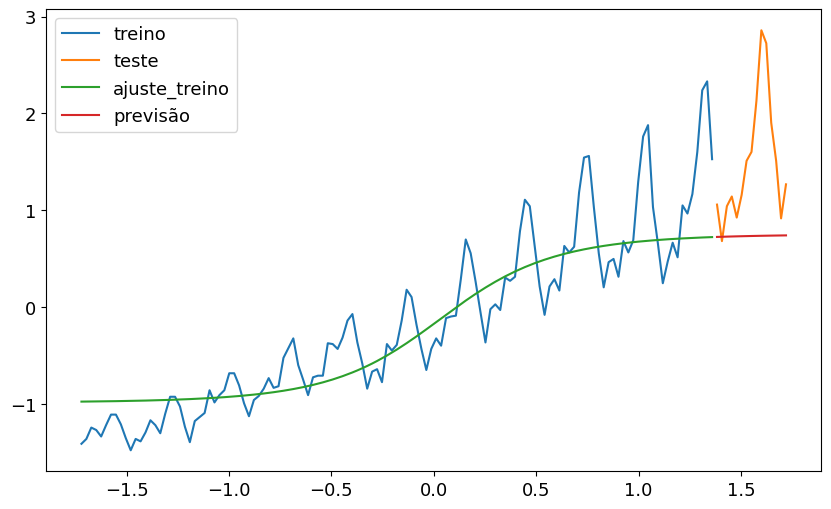

In [ ]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsão')

## rede 3

In [ ]:
vetor = pd.DataFrame(ytreino)[0]
vetor2 = pd.DataFrame(yteste)[0]


In [ ]:
def separa_dados(vetor,n_passos):
  X_novo,Y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    Y_novo.append(vetor.loc[i])
  X_novo,Y_novo = np.array(X_novo), np.array(Y_novo)
  return X_novo,Y_novo


In [ ]:
xtreino_novo,ytreino_novo = separa_dados(vetor,1)

In [ ]:
xteste_novo,yteste_novo = separa_dados(vetor2,1)

In [ ]:
regressor3 = Sequential()

In [ ]:
regressor3.add(Dense(8,input_dim=1,kernel_initializer='ones',
                     activation='linear',use_bias=False))
regressor3.add(Dense(64,kernel_initializer='random_uniform',
                     activation='sigmoid',use_bias=False))
regressor3.add(Dense(1,kernel_initializer='random_uniform',
                     activation='linear',use_bias=False))

In [ ]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8026
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7711
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7407
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7179
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7012
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6798
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6589
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6358
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6094
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5813
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5505
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5183
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

In [ ]:
y_predict_novo = regressor3.predict(xtreino_novo)

4/4 [==============================] - 0s 3ms/step


<Axes: xlabel='tempo', ylabel='0'>

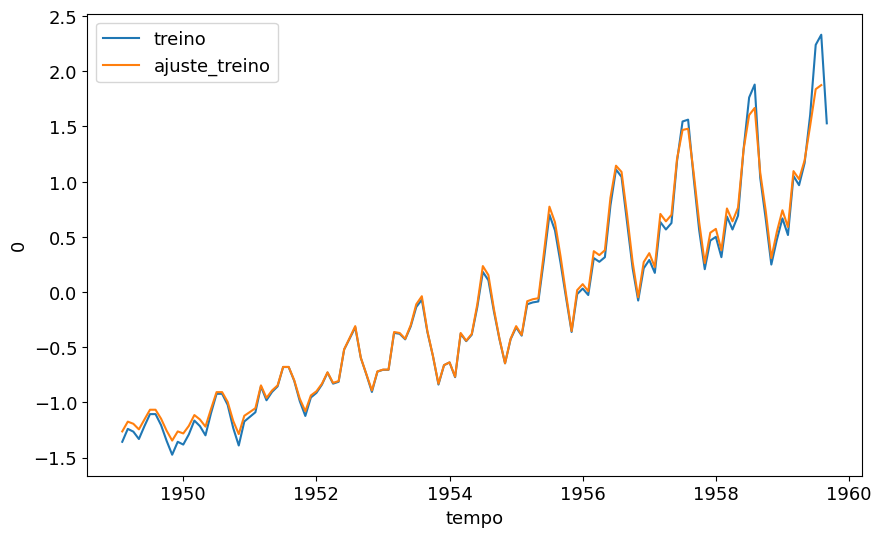

In [ ]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

In [ ]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 [==============================] - 0s 47ms/step


<Axes: xlabel='tempo', ylabel='0'>

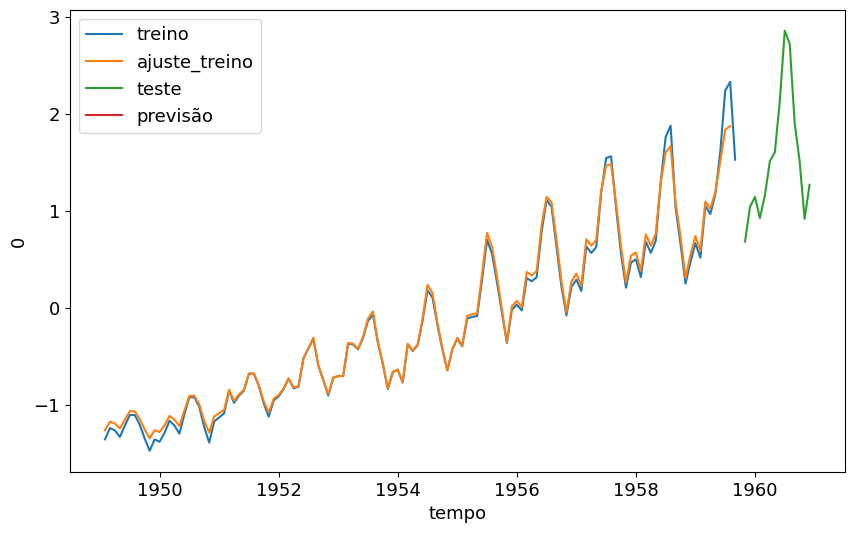

In [ ]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')
sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_teste_novo)[0],data=passageiros[130:144],label='previsão')

In [ ]:
xtreino_novo,ytreino_novo = separa_dados(vetor,4)
xteste_novo,yteste_novo = separa_dados(vetor2,4)

In [ ]:
regressor4 = Sequential()

In [ ]:
regressor4.add(Dense(8,input_dim=4,kernel_initializer='ones',
                     activation='linear',use_bias=False))
regressor4.add(Dense(64,kernel_initializer='random_uniform',
                     activation='sigmoid',use_bias=False))
regressor4.add(Dense(1,kernel_initializer='random_uniform',
                     activation='linear',use_bias=False))

In [ ]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7214
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6472
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5826
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5188
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4492
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3905
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3346
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2796
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2367
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2027
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1740
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1592
Epoch 13/300
4/4 [==============================] - 0s 3ms/st

In [ ]:
y_predict_novo = regressor4.predict(xtreino_novo)
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 [==============================] - 0s 21ms/step


In [ ]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo'>

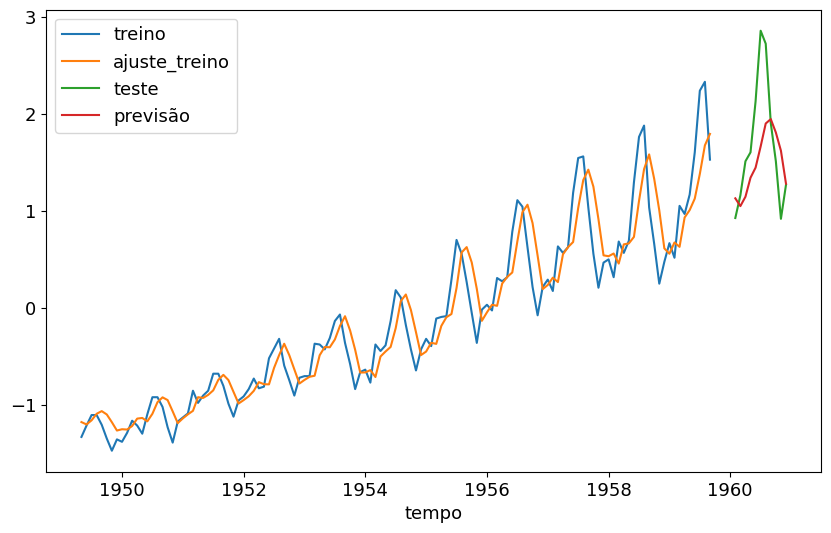

In [ ]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=resultado_treino.values,data=passageiros[4:129],label='ajuste_treino')
sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')

# Nova base de dados

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
bike = pd.read_csv('bicicletas(2).csv')

In [ ]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

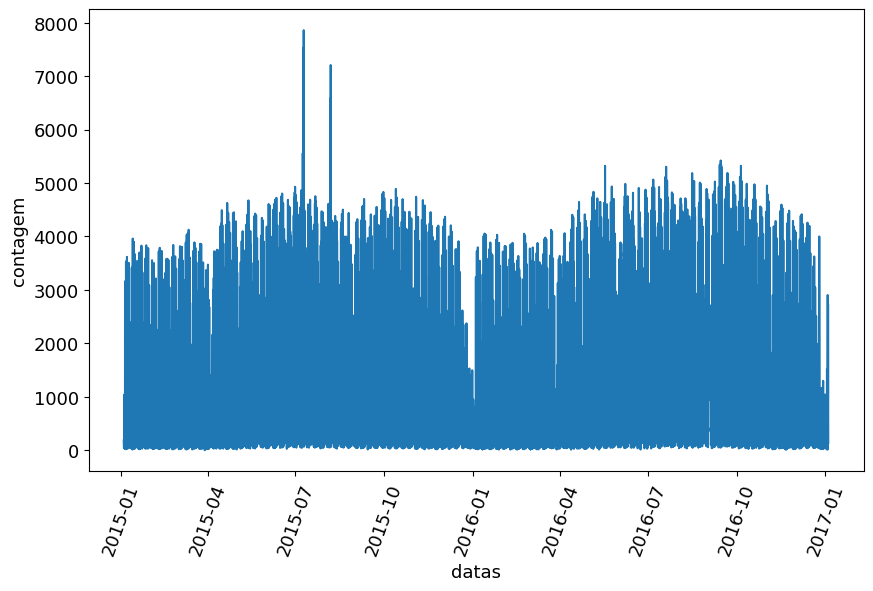

In [ ]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)

In [ ]:
sc2 = StandardScaler()
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [ ]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [ ]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [ ]:
yTreino = y[0:tamanho_treino]
yTeste = y[tamanho_treino:len(bike)]

In [ ]:
vetor = pd.DataFrame(yTreino)[0]
xtreino_novo, ytreino_novo = separa_dados(vetor,100)

In [ ]:
vetor2 = pd.DataFrame(yTeste)[0]
xteste_novo, yteste_novo = separa_dados(vetor2,10)

In [ ]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1],1))

In [ ]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1],1))

In [ ]:
recorrente = Sequential()
recorrente.add(LSTM(128,input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

In [ ]:
recorrente.compile(loss='mean_squared_error',optimizer='RMSProp')

In [ ]:
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
487/487 [==============================] - ETA: 0s - loss: 0.0687

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 100, 1), found shape=(None, 10, 1)


In [ ]:
y_ajustado = recorrente.predict(xtreino_novo)

In [ ]:
sns.lineplot(x='datas', y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas', y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
plt.xticks(rotation=70)

In [ ]:
y_predito = recorrente.predict(xteste_novo)

In [ ]:
sns.lineplot(x='datas', y=yteste[:,0],data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas', y=y_predito[:,0],data=bike[tamanho_treino+10:len(bike)],label='previsão')
plt.xticks(rotation=70)

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
recorrente_g = Sequential()
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))
recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente_g.summary()

In [ ]:
resultado2 = recorrente_g.fit(xtreino_novo, ytreino_novo,validation_data=(xteste_novo,yteste_novo), epochs=100)

In [ ]:
y_predito2 = recorrente_g.predict(xteste_novo)

In [ ]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas', y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],label='previsão')
plt.xticks(rotation=70)

In [ ]:
print(resultado2.history.keys())

In [ ]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
plt.xlabel('epocas')
plt.ylabel('custo')